# Task 2
- Train Q-Learning on Env
- Find Optimise Parameters
- Test Performance on Env

# Train Q-Learning on Env

In [17]:
import pandas as pd
import numpy as np
import random 
import gym
from trd_env import trading_env
import itertools as it
import matplotlib.pyplot as plt

In [8]:
# Import training data
train = pd.read_csv("btc_6H_(2016-2018).csv")
env = trading_env(train)
env.reset()

array([0.45, 0.5 , 0.  , 0.5 ])

In [9]:
# To reverse key/value in dictionary for indexing state
def reverse(t):
    return t[1],t[0]

# Finding unique observation values
ret_norm = set(train["3D_return_norm"])
macd = set(train["MACD_status"])
rsi = set(train["RSI_status"])
ema = set(train['EMA_status'])

# Creating indexing by combining unique state values
state = [(a,b,c,d) for a in ret_norm
       for b in macd
       for c in rsi
       for d in ema]
state1 = map(reverse,enumerate(state))
state2 = dict(state1)

# Creating empty Q table
ob_space = len(state)   # Length of observation space is number of states
action_space = 3        # Actions = Buy/Sell/Hold
Q = np.zeros([ob_space, action_space])

In [10]:
# Q-learning parameters
epsilon = 0.98
max_epsilon = 1
min_epsilon = 0.1
decay_rate = 0.01

# Learning rate & discount factor lists for grid searching
l_r = np.arange(0.1,0.9,0.1)
gamma_ = np.arange(0.9,0.99,0.01) 

total_episodes = 10
max_steps = len(train)-1
parameter_list = []
total_reward = []
total_reward_perc =[]
total_bought = []
total_sold = []

In [12]:
# Training loop

for lr, gamma in it.product(l_r, gamma_, repeat=1): # Grid Search
    print(f"lr={lr}, gamma={gamma}" ) 
    
    for ep in range(total_episodes):
        env.reset()
        current_state = tuple(env.observation())
        print(f"Current Episode: {ep}")
        total_steps = 0
        current_reward = []
        
        for step in range(max_steps):
            exp = random.uniform(0,1)
            if exp > epsilon:
                action = np.argmax(Q[state2[current_state]])
            else:
                action = np.random.choice([0,1,2])

            new_state, reward, done = env.step(action)
            new_state = tuple(new_state)
            temp = Q[state2[current_state]][action]
            temp1 = lr * (reward + gamma * np.argmax(Q[state2[new_state]]))
            temp2 = Q[state2[current_state]][action]

            Q[state2[current_state]][action] = (1 - lr) * temp + temp1

            current_state = new_state
            total_steps+= 1
            
            if done == True:
                break
            epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate*ep)

        print(env.render())
        parameter_list.append((lr, gamma))
        return_perc, return_value, bought, sold, ex = env.reward_output()
        total_reward.append(return_value)
        total_reward_perc.append(return_perc)
        total_bought.append(bought)
        total_sold.append(sold)

lr=0.1, gamma=0.9
Current Episode: 0
Current Porfolio Value:34570.73147471071; Available Capital: 27706.24245338321; Current Stocks Held: 1.9402769407511213
No. Stocks Bought:310.2003615866763; No. Stocks Sold:308.26008573592514; Average Cost:3500.6658448885332 
Return:245.70731474710706%; 24570.73147471071
Termination date: 2018-12-09 18:00:00
None
Current Episode: 1
Current Porfolio Value:26001.880221421867; Available Capital: 16120.295767191572; Current Stocks Held: 2.7877348923016436
No. Stocks Bought:314.99455209450707; No. Stocks Sold:312.2068182922057; Average Cost:3521.338044172721 
Return:160.01880221421868%; 16001.880221421867
Termination date: 2018-12-09 18:00:00
None
Current Episode: 2
Current Porfolio Value:18064.609811141177; Available Capital: 11482.111956474517; Current Stocks Held: 1.8583869868375795
No. Stocks Bought:202.7381344465732; No. Stocks Sold:200.87974854973584; Average Cost:3634.7986106703534 
Return:80.64609811141177%; 8064.6098111411775
Termination date: 2

Current Porfolio Value:21113.216135075454; Available Capital: 7490.061398356509; Current Stocks Held: 3.8461575147893083
No. Stocks Bought:251.3201659143612; No. Stocks Sold:247.4740094895715; Average Cost:3686.9295457413095 
Return:111.13216135075454%; 11113.216135075454
Termination date: 2018-12-09 18:00:00
None
Current Episode: 9
Current Porfolio Value:38738.32202551492; Available Capital: 8662.865250785173; Current Stocks Held: 8.478411716367807
No. Stocks Bought:310.28317612478884; No. Stocks Sold:301.80476549842103; Average Cost:3644.9258243884033 
Return:287.38322025514924%; 28738.32202551492
Termination date: 2018-12-09 18:00:00
None
lr=0.1, gamma=0.93
Current Episode: 0
Current Porfolio Value:24938.47860888753; Available Capital: 16004.735778490849; Current Stocks Held: 2.5203559326388865
No. Stocks Bought:303.18523159377617; No. Stocks Sold:300.6648767511372; Average Cost:3823.5900430336023 
Return:149.38478608887527%; 14938.47860888753
Termination date: 2018-12-09 18:00:00
N

Current Porfolio Value:25011.67293775573; Available Capital: 12635.17907777345; Current Stocks Held: 3.5038344222528353
No. Stocks Bought:271.5218622305486; No. Stocks Sold:268.01802889829594; Average Cost:3602.958973498876 
Return:150.1167293775573%; 15011.672937755731
Termination date: 2018-12-09 18:00:00
None
Current Episode: 6
Current Porfolio Value:21885.701836328397; Available Capital: 13822.56684469006; Current Stocks Held: 2.2729557766174855
No. Stocks Bought:261.40448762610015; No. Stocks Sold:259.13153293948284; Average Cost:3746.458788440449 
Return:118.85701836328397%; 11885.701836328397
Termination date: 2018-12-09 18:00:00
None
Current Episode: 7
Current Porfolio Value:19845.252038610768; Available Capital: 10342.790127911228; Current Stocks Held: 2.6828224924080146
No. Stocks Bought:240.26315520827353; No. Stocks Sold:237.5803338058653; Average Cost:3594.0345659550308 
Return:98.45252038610768%; 9845.252038610768
Termination date: 2018-12-09 18:00:00
None
Current Episode

Current Porfolio Value:35580.74249590567; Available Capital: 16982.803754698332; Current Stocks Held: 5.238259061755988
No. Stocks Bought:359.86010676961786; No. Stocks Sold:354.6218487978621; Average Cost:3792.6484926993053 
Return:255.80742495905673%; 25580.742495905673
Termination date: 2018-12-09 18:00:00
None
Current Episode: 5
Current Porfolio Value:28050.646904686106; Available Capital: 9090.318061627786; Current Stocks Held: 5.334284592986896
No. Stocks Bought:291.2528783534696; No. Stocks Sold:285.91859485048263; Average Cost:3703.8857054101913 
Return:180.50646904686104%; 18050.646904686106
Termination date: 2018-12-09 18:00:00
None
Current Episode: 6
Current Porfolio Value:36341.830606891264; Available Capital: 23371.087233252198; Current Stocks Held: 3.6738594409931373
No. Stocks Bought:361.62588427980785; No. Stocks Sold:357.9520259288146; Average Cost:3528.404300957886 
Return:263.4183060689126%; 26341.830606891264
Termination date: 2018-12-09 18:00:00
None
Current Episod

Current Porfolio Value:28140.56149967284; Available Capital: 12916.088178819035; Current Stocks Held: 4.2912013971287735
No. Stocks Bought:297.7194473256579; No. Stocks Sold:293.42824701852885; Average Cost:3563.4533117415745 
Return:181.40561499672842%; 18140.56149967284
Termination date: 2018-12-09 18:00:00
None
Current Episode: 8
Current Porfolio Value:21336.069680247252; Available Capital: 7519.055607229671; Current Stocks Held: 3.896707668048721
No. Stocks Bought:268.1208339174913; No. Stocks Sold:264.2241273394427; Average Cost:3751.5857122465013 
Return:113.36069680247252%; 11336.069680247252
Termination date: 2018-12-09 18:00:00
None
Current Episode: 9
Current Porfolio Value:33129.34764468964; Available Capital: 7102.178693968137; Current Stocks Held: 7.35227377494584
No. Stocks Bought:298.7278576481478; No. Stocks Sold:291.37558496320185; Average Cost:3598.8872105812457 
Return:231.2934764468964%; 23129.34764468964
Termination date: 2018-12-09 18:00:00
None
lr=0.2, gamma=0.93


Current Porfolio Value:22890.027217889372; Available Capital: 17976.51428232585; Current Stocks Held: 1.3878409074238596
No. Stocks Bought:251.08930722589054; No. Stocks Sold:249.70146740846653; Average Cost:3659.9064403692832 
Return:128.90027217889372%; 12890.027217889372
Termination date: 2018-12-09 18:00:00
None
Current Episode: 6
Current Porfolio Value:27260.4804695005; Available Capital: 4672.267424642257; Current Stocks Held: 6.356796425706798
No. Stocks Bought:291.1564022786168; No. Stocks Sold:284.79960694291026; Average Cost:3637.999945041015 
Return:172.60480469500501%; 17260.4804695005
Termination date: 2018-12-09 18:00:00
None
Current Episode: 7
Current Porfolio Value:14533.354411353914; Available Capital: 12538.764706089973; Current Stocks Held: 0.56496090991458
No. Stocks Bought:222.34916855990426; No. Stocks Sold:221.7842087399898; Average Cost:3778.246909087235 
Return:45.33354411353913%; 4533.354411353914
Termination date: 2018-12-09 18:00:00
None
Current Episode: 8
C

Current Porfolio Value:25925.695692299465; Available Capital: 5997.7273230009405; Current Stocks Held: 5.619429043532728
No. Stocks Bought:278.0444512129826; No. Stocks Sold:272.42502325945026; Average Cost:3625.590502999787 
Return:159.25695692299465%; 15925.695692299465
Termination date: 2018-12-09 18:00:00
None
Current Episode: 7
Current Porfolio Value:20305.372695044214; Available Capital: 12873.575604612892; Current Stocks Held: 2.0952138432987697
No. Stocks Bought:257.34697564233954; No. Stocks Sold:255.2517628890408; Average Cost:3829.3259214347245 
Return:103.05372695044215%; 10305.372695044214
Termination date: 2018-12-09 18:00:00
None
Current Episode: 8
Current Porfolio Value:19376.984079388174; Available Capital: 8429.634390784291; Current Stocks Held: 3.086165605453587
No. Stocks Bought:231.71780357543062; No. Stocks Sold:228.63163905997703; Average Cost:3816.6288408176415 
Return:93.76984079388174%; 9376.984079388174
Termination date: 2018-12-09 18:00:00
None
Current Episo

Current Porfolio Value:23903.821243726943; Available Capital: 5025.740325478058; Current Stocks Held: 5.327156976524996
No. Stocks Bought:269.7068134894389; No. Stocks Sold:264.37965760291365; Average Cost:3611.951846596313 
Return:139.03821243726944%; 13903.821243726943
Termination date: 2018-12-09 18:00:00
None
Current Episode: 1
Current Porfolio Value:41778.951767241626; Available Capital: 24458.98483675251; Current Stocks Held: 4.893330174491047
No. Stocks Bought:334.3257466820829; No. Stocks Sold:329.4324175975914; Average Cost:3798.3133522731187 
Return:317.78951767241625%; 31778.951767241626
Termination date: 2018-12-09 18:00:00
None
Current Episode: 2
Current Porfolio Value:31570.263880933886; Available Capital: 9609.829602003058; Current Stocks Held: 6.176573927281778
No. Stocks Bought:320.45165989624894; No. Stocks Sold:314.2750870589667; Average Cost:3611.9104557269497 
Return:215.70263880933885%; 21570.263880933886
Termination date: 2018-12-09 18:00:00
None
Current Episode:

Current Porfolio Value:28251.061955792262; Available Capital: 18282.05166975353; Current Stocks Held: 2.821434200300975
No. Stocks Bought:284.0799764192379; No. Stocks Sold:281.25854330893674; Average Cost:3548.9285776825773 
Return:182.51061955792264%; 18251.061955792262
Termination date: 2018-12-09 18:00:00
None
Current Episode: 2
Current Porfolio Value:22693.63905397497; Available Capital: 10950.32031268236; Current Stocks Held: 3.3261618898569916
No. Stocks Bought:237.327379019378; No. Stocks Sold:234.00121821952095; Average Cost:3509.202198568566 
Return:126.9363905397497%; 12693.63905397497
Termination date: 2018-12-09 18:00:00
None
Current Episode: 3
Current Porfolio Value:23805.041792982083; Available Capital: 14200.974942327386; Current Stocks Held: 2.7130575868879854
No. Stocks Bought:282.7609755078994; No. Stocks Sold:280.0479190110113; Average Cost:3686.3901478348776 
Return:138.0504179298208%; 13805.041792982083
Termination date: 2018-12-09 18:00:00
None
Current Episode: 4

Current Porfolio Value:23336.907333849533; Available Capital: 16658.885345863266; Current Stocks Held: 1.8783903708628085
No. Stocks Bought:273.4316352586535; No. Stocks Sold:271.5532459777904; Average Cost:3573.716072240067 
Return:133.36907333849533%; 13336.907333849533
Termination date: 2018-12-09 18:00:00
None
Current Episode: 2
Current Porfolio Value:30542.752307714985; Available Capital: 8263.966802708597; Current Stocks Held: 6.302939779085818
No. Stocks Bought:326.3848601249557; No. Stocks Sold:320.0819214358696; Average Cost:3601.470146043083 
Return:205.42752307714983%; 20542.752307714985
Termination date: 2018-12-09 18:00:00
None
Current Episode: 3
Current Porfolio Value:35772.38981070299; Available Capital: 22400.73222629937; Current Stocks Held: 3.785221717452112
No. Stocks Bought:318.8471561993839; No. Stocks Sold:315.06193557193205; Average Cost:3856.3623839245174 
Return:257.72389810702987%; 25772.38981070299
Termination date: 2018-12-09 18:00:00
None
Current Episode: 4

Current Porfolio Value:31975.95005671898; Available Capital: 16424.261280221286; Current Stocks Held: 4.380881658581528
No. Stocks Bought:309.11854681513296; No. Stocks Sold:304.73766624655184; Average Cost:3600.681276897938 
Return:219.75950056718978%; 21975.95005671898
Termination date: 2018-12-09 18:00:00
None
Current Episode: 9
Current Porfolio Value:31777.490189067248; Available Capital: 11478.426757177413; Current Stocks Held: 5.744950459039076
No. Stocks Bought:305.5154630158845; No. Stocks Sold:299.7705136468455; Average Cost:3757.8517601139165 
Return:217.7749018906725%; 21777.490189067248
Termination date: 2018-12-09 18:00:00
None
lr=0.4, gamma=0.92
Current Episode: 0
Current Porfolio Value:19844.743842492746; Available Capital: 12844.70439005767; Current Stocks Held: 1.9773601359456143
No. Stocks Bought:251.45331093211868; No. Stocks Sold:249.47595188617325; Average Cost:3654.564836777566 
Return:98.44743842492746%; 9844.743842492746
Termination date: 2018-12-09 18:00:00
Non

Termination date: 2018-12-09 18:00:00
None
Current Episode: 4
Current Porfolio Value:28150.37353438293; Available Capital: 24692.213885106696; Current Stocks Held: 0.9757776597314816
No. Stocks Bought:284.5275126988278; No. Stocks Sold:283.5517361290961; Average Cost:3691.342276776139 
Return:181.50373534382928%; 18150.37353438293
Termination date: 2018-12-09 18:00:00
None
Current Episode: 5
Current Porfolio Value:39815.938810884974; Available Capital: 14325.319049235093; Current Stocks Held: 7.220319059175988
No. Stocks Bought:297.03340084575945; No. Stocks Sold:289.8130828765835; Average Cost:3592.0305174558116 
Return:298.1593881088497%; 29815.938810884974
Termination date: 2018-12-09 18:00:00
None
Current Episode: 6
Current Porfolio Value:29420.48343032985; Available Capital: 14673.09058264022; Current Stocks Held: 4.172373001593382
No. Stocks Bought:307.1143602196364; No. Stocks Sold:302.9419883080429; Average Cost:3629.966646917965 
Return:194.2048343032985%; 19420.48343032985
Te

Current Porfolio Value:20790.933800864124; Available Capital: 8135.726257051829; Current Stocks Held: 3.58204186377564
No. Stocks Bought:256.07653620981347; No. Stocks Sold:252.494495436038; Average Cost:3536.931389274483 
Return:107.90933800864124%; 10790.933800864124
Termination date: 2018-12-09 18:00:00
None
Current Episode: 3
Current Porfolio Value:13914.584586844678; Available Capital: 3453.882684523171; Current Stocks Held: 2.958983240387728
No. Stocks Bought:203.98425293268275; No. Stocks Sold:201.02527078229483; Average Cost:3723.035655593805 
Return:39.14584586844678%; 3914.5845868446777
Termination date: 2018-12-09 18:00:00
None
Current Episode: 4
Current Porfolio Value:23320.4137285156; Available Capital: 14512.487083433205; Current Stocks Held: 2.477988011516588
No. Stocks Bought:267.3913013834694; No. Stocks Sold:264.9133144619532; Average Cost:3619.7700590814698 
Return:133.20413728515598%; 13320.4137285156
Termination date: 2018-12-09 18:00:00
None
Current Episode: 5
Cur

Current Porfolio Value:19716.96819471869; Available Capital: 11246.324534589538; Current Stocks Held: 2.3848109712438292
No. Stocks Bought:253.1888496394661; No. Stocks Sold:250.80403975822225; Average Cost:3616.2436288607087 
Return:97.16968194718692%; 9716.968194718691
Termination date: 2018-12-09 18:00:00
None
Current Episode: 2
Current Porfolio Value:25084.6141164411; Available Capital: 10781.534646960536; Current Stocks Held: 4.044018677125693
No. Stocks Bought:286.7145550566798; No. Stocks Sold:282.67053746955423; Average Cost:3584.1019260127323 
Return:150.84614116441097%; 15084.614116441098
Termination date: 2018-12-09 18:00:00
None
Current Episode: 3
Current Porfolio Value:36056.52491014426; Available Capital: 18165.16701436222; Current Stocks Held: 5.060493415470757
No. Stocks Bought:383.6154493329626; No. Stocks Sold:378.55495700749145; Average Cost:3684.6933264409117 
Return:260.5652491014426%; 26056.52491014426
Termination date: 2018-12-09 18:00:00
None
Current Episode: 4


Current Porfolio Value:40861.14993954868; Available Capital: 31212.051620346432; Current Stocks Held: 2.7266837783295146
No. Stocks Bought:353.5182288159815; No. Stocks Sold:350.79154612765177; Average Cost:3807.627809813526 
Return:308.6114993954868%; 30861.149939548683
Termination date: 2018-12-09 18:00:00
None
Current Episode: 7
Current Porfolio Value:39488.31841894539; Available Capital: 17584.539797498153; Current Stocks Held: 6.177216710245649
No. Stocks Bought:357.6294940189427; No. Stocks Sold:351.45227839869705; Average Cost:3710.5083240043987 
Return:294.8831841894539%; 29488.31841894539
Termination date: 2018-12-09 18:00:00
None
Current Episode: 8
Current Porfolio Value:17136.807911270334; Available Capital: 12627.248582437085; Current Stocks Held: 1.2725609124072488
No. Stocks Bought:218.61124123545903; No. Stocks Sold:217.3386814130521; Average Cost:3644.7733306370346 
Return:71.36807911270334%; 7136.807911270334
Termination date: 2018-12-09 18:00:00
None
Current Episode: 

Current Porfolio Value:27287.69384624336; Available Capital: 11227.003579084652; Current Stocks Held: 4.520592732863785
No. Stocks Bought:272.8688085269285; No. Stocks Sold:268.3482168840647; Average Cost:3756.3720297889045 
Return:172.87693846243363%; 17287.69384624336
Termination date: 2018-12-09 18:00:00
None
Current Episode: 5
Current Porfolio Value:25662.805051768995; Available Capital: 10170.36283822746; Current Stocks Held: 4.371047003025104
No. Stocks Bought:283.7501429485557; No. Stocks Sold:279.3790970355306; Average Cost:3498.440272562173 
Return:156.62805051768996%; 15662.805051768995
Termination date: 2018-12-09 18:00:00
None
Current Episode: 6
Current Porfolio Value:23229.27890406037; Available Capital: 2415.2671264455807; Current Stocks Held: 5.881196699823297
No. Stocks Bought:248.920059313067; No. Stocks Sold:243.0388637032439; Average Cost:3691.7000188297966 
Return:132.2927890406037%; 13229.278904060371
Termination date: 2018-12-09 18:00:00
None
Current Episode: 7
Cu

Current Porfolio Value:26772.782715420413; Available Capital: 10019.409040886561; Current Stocks Held: 4.741121498995877
No. Stocks Bought:265.0112504345044; No. Stocks Sold:260.27013002550876; Average Cost:3585.6314152880823 
Return:167.72782715420414%; 16772.782715420413
Termination date: 2018-12-09 18:00:00
None
lr=0.6, gamma=0.9
Current Episode: 0
Current Porfolio Value:20840.271866077368; Available Capital: 10913.396947060002; Current Stocks Held: 2.8091860607112906
No. Stocks Bought:237.42156413465003; No. Stocks Sold:234.6123791639389; Average Cost:3540.33096251958 
Return:108.40271866077369%; 10840.271866077368
Termination date: 2018-12-09 18:00:00
None
Current Episode: 1
Current Porfolio Value:27522.777000645714; Available Capital: 10000.14544865653; Current Stocks Held: 4.9501840124588545
No. Stocks Bought:272.8479886912905; No. Stocks Sold:267.8978057688319; Average Cost:3710.1955667704624 
Return:175.22777000645715%; 17522.777000645714
Termination date: 2018-12-09 18:00:00


Current Porfolio Value:32941.09354502029; Available Capital: 14800.13820943198; Current Stocks Held: 5.1133078258779925
No. Stocks Bought:310.0005694733321; No. Stocks Sold:304.8872627374539; Average Cost:3608.3954208115492 
Return:229.41093545020289%; 22941.09354502029
Termination date: 2018-12-09 18:00:00
None
Current Episode: 9
Current Porfolio Value:25457.846496211336; Available Capital: 14308.945921763072; Current Stocks Held: 3.152595246633983
No. Stocks Bought:268.71404310932155; No. Stocks Sold:265.5614489526876; Average Cost:3572.6384146423993 
Return:154.57846496211337%; 15457.846496211336
Termination date: 2018-12-09 18:00:00
None
lr=0.6, gamma=0.93
Current Episode: 0
Current Porfolio Value:29373.45334799307; Available Capital: 12654.009187495569; Current Stocks Held: 4.716173370951677
No. Stocks Bought:313.14033887569764; No. Stocks Sold:308.42416659474594; Average Cost:3677.4017378157578 
Return:193.7345334799307%; 19373.45334799307
Termination date: 2018-12-09 18:00:00
No

Current Porfolio Value:24676.758351400502; Available Capital: 8569.42235378334; Current Stocks Held: 4.54483828403587
No. Stocks Bought:271.2319998366944; No. Stocks Sold:266.68716264265834; Average Cost:3685.5723220551677 
Return:146.76758351400503%; 14676.758351400502
Termination date: 2018-12-09 18:00:00
None
Current Episode: 5
Current Porfolio Value:25442.38666998988; Available Capital: 5402.130862506554; Current Stocks Held: 5.651576874646386
No. Stocks Bought:281.0917574138675; No. Stocks Sold:275.44018162922106; Average Cost:3587.655398948003 
Return:154.42386669989878%; 15442.386669989879
Termination date: 2018-12-09 18:00:00
None
Current Episode: 6
Current Porfolio Value:35917.497592492786; Available Capital: 17552.516538271844; Current Stocks Held: 5.181491181664798
No. Stocks Bought:294.7226400967927; No. Stocks Sold:289.54115000512815; Average Cost:3562.2172942568263 
Return:259.1749759249279%; 25917.497592492786
Termination date: 2018-12-09 18:00:00
None
Current Episode: 7

Current Porfolio Value:27099.467719752443; Available Capital: 15493.311849071057; Current Stocks Held: 3.28466448577501
No. Stocks Bought:260.76652918245475; No. Stocks Sold:257.48186578667975; Average Cost:3824.8025748763303 
Return:170.99467719752442%; 17099.467719752443
Termination date: 2018-12-09 18:00:00
None
Current Episode: 2
Current Porfolio Value:41572.95657372709; Available Capital: 13751.830963719563; Current Stocks Held: 7.879053757292617
No. Stocks Bought:328.88857423109005; No. Stocks Sold:321.0095215637977; Average Cost:3466.3246386918263 
Return:315.7295657372709%; 31572.95657372709
Termination date: 2018-12-09 18:00:00
None
Current Episode: 3
Current Porfolio Value:37283.325849684166; Available Capital: 18655.350771676003; Current Stocks Held: 5.245145030912982
No. Stocks Bought:348.2246584246308; No. Stocks Sold:342.97951448371776; Average Cost:3663.0844833655306 
Return:272.83325849684167%; 27283.325849684166
Termination date: 2018-12-09 18:00:00
None
Current Episod

Current Porfolio Value:39972.85845420505; Available Capital: 12616.61488517194; Current Stocks Held: 7.742886507184457
No. Stocks Bought:328.3837470085136; No. Stocks Sold:320.6408615913291; Average Cost:3596.928342402992 
Return:299.72858454205056%; 29972.858454205052
Termination date: 2018-12-09 18:00:00
None
Current Episode: 1
Current Porfolio Value:30691.504439635057; Available Capital: 15507.920119541563; Current Stocks Held: 4.282044418761361
No. Stocks Bought:273.9196658483255; No. Stocks Sold:269.63762251956416; Average Cost:3624.736766182003 
Return:206.91504439635057%; 20691.504439635057
Termination date: 2018-12-09 18:00:00
None
Current Episode: 2
Current Porfolio Value:29966.888165508364; Available Capital: 12690.027094906203; Current Stocks Held: 4.889276640394758
No. Stocks Bought:312.2888399373725; No. Stocks Sold:307.3995643869774; Average Cost:3714.305665401084 
Return:199.66888165508365%; 19966.888165508364
Termination date: 2018-12-09 18:00:00
None
Current Episode: 3

Current Porfolio Value:28090.564623196195; Available Capital: 18592.731432205674; Current Stocks Held: 2.684695384039566
No. Stocks Bought:267.1780854981785; No. Stocks Sold:264.4933912041389; Average Cost:3575.4580196879515 
Return:180.90564623196195%; 18090.564623196195
Termination date: 2018-12-09 18:00:00
None
Current Episode: 7
Current Porfolio Value:27057.439239774132; Available Capital: 10558.86627605684; Current Stocks Held: 4.650187074119346
No. Stocks Bought:294.42011348084304; No. Stocks Sold:289.7699274967238; Average Cost:3650.9647308001327 
Return:170.57439239774132%; 17057.439239774132
Termination date: 2018-12-09 18:00:00
None
Current Episode: 8
Current Porfolio Value:26992.780230608183; Available Capital: 9513.252669323567; Current Stocks Held: 4.919225066403351
No. Stocks Bought:302.6040750914658; No. Stocks Sold:297.68485111506226; Average Cost:3614.9061963304703 
Return:169.92780230608182%; 16992.780230608183
Termination date: 2018-12-09 18:00:00
None
Current Episod

Current Porfolio Value:30897.393744036635; Available Capital: 11409.467869869168; Current Stocks Held: 5.501044203536582
No. Stocks Bought:295.39850008434723; No. Stocks Sold:289.8974569708105; Average Cost:3506.189411400699 
Return:208.97393744036634%; 20897.393744036635
Termination date: 2018-12-09 18:00:00
None
Current Episode: 8
Current Porfolio Value:27606.729704148092; Available Capital: 9086.934030962033; Current Stocks Held: 5.222515372466758
No. Stocks Bought:286.8666548082424; No. Stocks Sold:281.644140525776; Average Cost:3644.460898220457 
Return:176.0672970414809%; 17606.729704148092
Termination date: 2018-12-09 18:00:00
None
Current Episode: 9
Current Porfolio Value:19795.952783215726; Available Capital: 8942.330640728525; Current Stocks Held: 3.0645397088028354
No. Stocks Bought:264.0146809612261; No. Stocks Sold:260.950142342423; Average Cost:3734.079776061257 
Return:97.95952783215725%; 9795.952783215726
Termination date: 2018-12-09 18:00:00
None
lr=0.7000000000000001,

Current Porfolio Value:21291.61271601973; Available Capital: 2515.1078547128373; Current Stocks Held: 5.293101833814739
No. Stocks Bought:227.56073624972572; No. Stocks Sold:222.26763550591087; Average Cost:3699.5691567982426 
Return:112.91612716019728%; 11291.612716019728
Termination date: 2018-12-09 18:00:00
None
Current Episode: 2
Current Porfolio Value:29315.744198081993; Available Capital: 10616.154702835312; Current Stocks Held: 5.261999264962528
No. Stocks Bought:288.50431571274464; No. Stocks Sold:283.242317537782; Average Cost:3622.7109554457534 
Return:193.15744198081993%; 19315.744198081993
Termination date: 2018-12-09 18:00:00
None
Current Episode: 3
Current Porfolio Value:26230.277915106733; Available Capital: 10980.10241981326; Current Stocks Held: 4.319663899543082
No. Stocks Bought:281.98590248107945; No. Stocks Sold:277.66623967153635; Average Cost:3542.1834463274363 
Return:162.30277915106734%; 16230.277915106733
Termination date: 2018-12-09 18:00:00
None
Current Epis

Current Porfolio Value:20493.738333348236; Available Capital: 13155.118920086572; Current Stocks Held: 2.073350686298252
No. Stocks Bought:256.26221038333364; No. Stocks Sold:254.18886078703554; Average Cost:3746.6081846798716 
Return:104.93738333348234%; 10493.738333348236
Termination date: 2018-12-09 18:00:00
None
Current Episode: 8
Current Porfolio Value:21498.66459721407; Available Capital: 8827.777440301956; Current Stocks Held: 3.5807349338330647
No. Stocks Bought:242.75202292178645; No. Stocks Sold:239.17128907795316; Average Cost:3771.9535190671095 
Return:114.98664597214068%; 11498.664597214069
Termination date: 2018-12-09 18:00:00
None
Current Episode: 9
Current Porfolio Value:22942.493496877672; Available Capital: 7888.847633643092; Current Stocks Held: 4.245410390630729
No. Stocks Bought:267.7372977383649; No. Stocks Sold:263.49188843773385; Average Cost:3555.1928065457964 
Return:129.4249349687767%; 12942.493496877672
Termination date: 2018-12-09 18:00:00
None
lr=0.8, gamm

Current Porfolio Value:30796.195981634643; Available Capital: 9154.399839701358; Current Stocks Held: 6.0951889512335145
No. Stocks Bought:271.3985961002603; No. Stocks Sold:265.30340823902685; Average Cost:3579.230310918147 
Return:207.96195981634642%; 20796.195981634643
Termination date: 2018-12-09 18:00:00
None
Current Episode: 2
Current Porfolio Value:19315.35701119008; Available Capital: 7376.2120725590985; Current Stocks Held: 3.3774849306642842
No. Stocks Bought:232.73044216300124; No. Stocks Sold:229.3529583223369; Average Cost:3649.4457558843674 
Return:93.1535701119008%; 9315.35701119008
Termination date: 2018-12-09 18:00:00
None
Current Episode: 3
Current Porfolio Value:22698.97968607578; Available Capital: 16041.652594562162; Current Stocks Held: 1.885258285274078
No. Stocks Bought:255.74916440021985; No. Stocks Sold:253.86390720494566; Average Cost:3641.977639667983 
Return:126.98979686075782%; 12698.979686075782
Termination date: 2018-12-09 18:00:00
None
Current Episode: 

# Find Optimal Parameters

In [14]:
# Grid search
grid_result = pd.DataFrame({"parameters": parameter_list, "return_values": total_reward})
mean = pd.DataFrame(grid_result.groupby(['parameters']).mean())
variance = pd.DataFrame((grid_result.groupby(['parameters']).var()))

# Finding best learning perameters
print(f"Max mean = {mean.max()}, LP= {mean.idxmax()}, Min variance= {variance.min()}, LP= {variance.idxmin()}")

Max mean = return_values    23650.603492
dtype: float64, LP= return_values    (0.8, 0.9400000000000001)
dtype: object, Min variance= return_values    1.430797e+07
dtype: float64, LP= return_values    (0.7000000000000001, 0.9600000000000001)
dtype: object


In [15]:
display(variance)

return_values
parameters                              
(0.1, 0.9)                  2.965825e+07
(0.1, 0.91)                 3.023065e+07
(0.1, 0.92)                 5.481612e+07
(0.1, 0.93)                 3.399492e+07
(0.1, 0.9400000000000001)   5.617800e+07
...                                  ...
(0.8, 0.9400000000000001)   8.941254e+07
(0.8, 0.9500000000000001)   3.441793e+07
(0.8, 0.9600000000000001)   9.963526e+07
(0.8, 0.9700000000000001)   4.444159e+07
(0.8, 0.9800000000000001)   6.086006e+07

[72 rows x 1 columns]

Text(0, 0.5, 'Return')

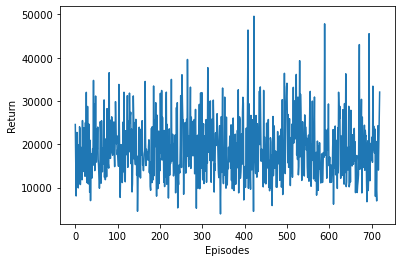

In [19]:
x_axis = np.arange(0,720)
plt.plot(x_axis,total_reward)
plt.xlabel('Episodes')
plt.ylabel('Return')

In [ ]:
# Best parameters, those with lowest variance chosen lr = 0.7 gamma = 0.96

# Test Performance on Env

In [20]:
# Import test data
test = pd.read_csv("btc_6H_(2020-2021).csv")
env_t = trading_env(train)
env.reset()

array([0.45, 0.5 , 0.  , 0.5 ])

In [21]:
# To reverse key/value in dictionary for indexing state
def reverse(t):
    return t[1],t[0]

# Finding unique observation values
ret_norm1 = set(test["3D_return_norm"])
macd1 = set(test["MACD_status"])
rsi1 = set(test["RSI_status"])
ema1 = set(test['EMA_status'])

# Creating indexing by combining unique state values
state_ = [(a,b,c,d) for a in ret_norm
       for b in macd
       for c in rsi
       for d in ema]
state1_ = map(reverse,enumerate(state))
state2_ = dict(state1)

# Creating empty Q table + adding training Q-Table
ob_space1 = len(state_) + len(state)  # Length of observation space is number of states
action_space1 = 3        # Actions = Buy/Sell/Hold
Q2 = np.zeros([ob_space1, action_space1])
Q1 = np.concatenate((Q2,Q))

In [23]:
# Optimal Q-learning parameters
epsilon = 0.98
max_epsilon = 1
min_epsilon = 0.1
decay_rate = 0.01
l_r = 0.7
gamma_ = 0.96 


total_episodes = 1000
max_steps = len(test)-1
parameter_list = []
total_reward = []
total_reward_perc =[]
total_bought = []
total_sold = []

In [25]:
# Testing run

for ep in range(total_episodes):
        env.reset()
        current_state = tuple(env.observation())
        print(f"Current Episode: {ep}")
        total_steps = 0
        current_reward = []
        
        for step in range(max_steps):
            exp = random.uniform(0,1)
            if exp > epsilon:
                action = np.argmax(Q1[state2[current_state]])
            else:
                action = np.random.choice([0,1,2])

            new_state, reward, done = env.step(action)
            new_state = tuple(new_state)
            temp = Q1[state2[current_state]][action]
            temp1 = lr * (reward + gamma * np.argmax(Q1[state2[new_state]]))
            temp2 = Q[state2[current_state]][action]

            Q1[state2[current_state]][action] = (1 - lr) * temp + temp1

            current_state = new_state
            total_steps+= 1
            
            if done == True:
                break
            epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate*ep)

        print(env.render())
        parameter_list.append((lr, gamma))
        return_perc,return_value,bought,sold,x = env.reward_output()
        total_reward.append(return_value)
        total_reward_perc.append(return_perc)
        total_bought.append(bought)
        total_sold.append(sold)

Current Episode: 0
Current Porfolio Value:23996.33022944455; Available Capital: 10214.59007001329; Current Stocks Held: 5.089937148696686
No. Stocks Bought:127.09534343324945; No. Stocks Sold:122.00540737455276; Average Cost:2577.1071791513386 
Return:139.9633022944455%; 13996.33022944455
Termination date: 2017-08-03 00:00:00
None
Current Episode: 1
Current Porfolio Value:16626.87646886908; Available Capital: 13136.1610018004; Current Stocks Held: 1.287547171315838
No. Stocks Bought:86.87364984812396; No. Stocks Sold:85.5861037668081; Average Cost:2541.962404836217 
Return:66.26876468869078%; 6626.876468869079
Termination date: 2017-08-03 00:00:00
None
Current Episode: 2
Current Porfolio Value:23645.624722359127; Available Capital: 10782.431386566222; Current Stocks Held: 4.750896909651044
No. Stocks Bought:133.4091721456057; No. Stocks Sold:128.65827632595472; Average Cost:2641.8985965161282 
Return:136.45624722359128%; 13645.624722359127
Termination date: 2017-08-03 00:00:00
None
Cur

Current Porfolio Value:22460.12609526435; Available Capital: 11801.535617131747; Current Stocks Held: 3.9382778264784086
No. Stocks Bought:127.92038503797434; No. Stocks Sold:123.98210830149588; Average Cost:2524.65311785953 
Return:124.6012609526435%; 12460.12609526435
Termination date: 2017-08-03 00:00:00
None
Current Episode: 35
Current Porfolio Value:24827.47156253358; Available Capital: 12191.526481786259; Current Stocks Held: 4.662314229605901
No. Stocks Bought:118.26222914077276; No. Stocks Sold:113.59991600116692; Average Cost:2551.758261281083 
Return:148.2747156253358%; 14827.471562533581
Termination date: 2017-08-03 00:00:00
None
Current Episode: 36
Current Porfolio Value:21301.134867167762; Available Capital: 3945.989883451936; Current Stocks Held: 6.4190184343697805
No. Stocks Bought:121.78879644655936; No. Stocks Sold:115.3697791021896; Average Cost:2529.298256113468 
Return:113.01134867167761%; 11301.134867167762
Termination date: 2017-08-03 00:00:00
None
Current Episode

Current Porfolio Value:22269.232308533938; Available Capital: 8195.51797638313; Current Stocks Held: 5.191831480686325
No. Stocks Bought:141.1681925116676; No. Stocks Sold:135.97636212098126; Average Cost:2582.432705848 
Return:122.69232308533937%; 12269.232308533938
Termination date: 2017-08-03 00:00:00
None
Current Episode: 63
Current Porfolio Value:22260.059921333457; Available Capital: 15489.505829585341; Current Stocks Held: 2.5025299947708106
No. Stocks Bought:130.36578537665721; No. Stocks Sold:127.86325647188646; Average Cost:2567.1080547199986 
Return:122.60059921333458%; 12260.059921333457
Termination date: 2017-08-03 00:00:00
None
Current Episode: 64
Current Porfolio Value:23088.482036723075; Available Capital: 11779.615336058438; Current Stocks Held: 4.180337274483374
No. Stocks Bought:127.53412468784359; No. Stocks Sold:123.35378850336028; Average Cost:2570.2487546728416 
Return:130.88482036723076%; 13088.482036723075
Termination date: 2017-08-03 00:00:00
None
Current Epis

Current Porfolio Value:19137.104559555963; Available Capital: 3718.5672225866306; Current Stocks Held: 5.689786042283854
No. Stocks Bought:125.73409712031426; No. Stocks Sold:120.04431216803039; Average Cost:2630.5790599215075 
Return:91.37104559555964%; 9137.104559555963
Termination date: 2017-08-03 00:00:00
None
Current Episode: 91
Current Porfolio Value:24976.53837325735; Available Capital: 9708.293697660256; Current Stocks Held: 5.64154798258592
No. Stocks Bought:130.95682239143053; No. Stocks Sold:125.31527549884468; Average Cost:2568.539310161959 
Return:149.7653837325735%; 14976.53837325735
Termination date: 2017-08-03 00:00:00
None
Current Episode: 92
Current Porfolio Value:22915.8335616446; Available Capital: 9276.009097988504; Current Stocks Held: 5.031878224011373
No. Stocks Bought:127.47308822791032; No. Stocks Sold:122.441211093899; Average Cost:2493.2647349829813 
Return:129.15833561644598%; 12915.833561644598
Termination date: 2017-08-03 00:00:00
None
Current Episode: 93

Current Porfolio Value:23786.020267292228; Available Capital: 13417.05303512714; Current Stocks Held: 3.8287379949455866
No. Stocks Bought:131.5459142286448; No. Stocks Sold:127.71717732369922; Average Cost:2551.8547333112333 
Return:137.86020267292227%; 13786.020267292228
Termination date: 2017-08-03 00:00:00
None
Current Episode: 122
Current Porfolio Value:19071.305704255792; Available Capital: 14573.808926493224; Current Stocks Held: 1.658472904151065
No. Stocks Bought:133.54177646959639; No. Stocks Sold:131.88330465544527; Average Cost:2571.4210217126947 
Return:90.71305704255792%; 9071.305704255792
Termination date: 2017-08-03 00:00:00
None
Current Episode: 123
Current Porfolio Value:16193.80955879165; Available Capital: 6700.4269447405195; Current Stocks Held: 3.5043585643765853
No. Stocks Bought:105.94283287353292; No. Stocks Sold:102.43847539915645; Average Cost:2579.5894430797534 
Return:61.93809558791651%; 6193.8095587916505
Termination date: 2017-08-03 00:00:00
None
Current 

Current Porfolio Value:25502.376606258942; Available Capital: 9168.78528966706; Current Stocks Held: 6.027179972029108
No. Stocks Bought:141.09885797795798; No. Stocks Sold:135.0716790959289; Average Cost:2569.3334421200643 
Return:155.02376606258943%; 15502.376606258942
Termination date: 2017-08-03 00:00:00
None
Current Episode: 151
Current Porfolio Value:19897.708700503943; Available Capital: 10250.32428212358; Current Stocks Held: 3.567298587350208
No. Stocks Bought:124.23869807501065; No. Stocks Sold:120.67140057766045; Average Cost:2549.713668289164 
Return:98.97708700503944%; 9897.708700503943
Termination date: 2017-08-03 00:00:00
None
Current Episode: 152
Current Porfolio Value:31352.69442811438; Available Capital: 14854.504579998276; Current Stocks Held: 6.0925215063651885
No. Stocks Bought:157.08708578981012; No. Stocks Sold:150.99456537344506; Average Cost:2538.1032272243665 
Return:213.5269442811438%; 21352.69442811438
Termination date: 2017-08-03 00:00:00
None
Current Episo

Current Porfolio Value:15841.295066707413; Available Capital: 7764.825394380972; Current Stocks Held: 2.979091131507192
No. Stocks Bought:113.14769897301827; No. Stocks Sold:110.16860893151102; Average Cost:2604.9662335763196 
Return:58.41295066707413%; 5841.295066707413
Termination date: 2017-08-03 00:00:00
None
Current Episode: 183
Current Porfolio Value:23887.687684933335; Available Capital: 10143.467991931251; Current Stocks Held: 5.071051180859191
No. Stocks Bought:146.04064746080763; No. Stocks Sold:140.96959736994847; Average Cost:2578.197487408625 
Return:138.87687684933334%; 13887.687684933335
Termination date: 2017-08-03 00:00:00
None
Current Episode: 184
Current Porfolio Value:22531.76934027363; Available Capital: 19096.88969070494; Current Stocks Held: 1.2697481061432776
No. Stocks Bought:129.09787400985238; No. Stocks Sold:127.82812699370916; Average Cost:2624.5612673907244 
Return:125.31769340273628%; 12531.76934027363
Termination date: 2017-08-03 00:00:00
None
Current Ep

Current Porfolio Value:23083.221218788716; Available Capital: 15065.101189023877; Current Stocks Held: 2.956280847351727
No. Stocks Bought:139.90269561350368; No. Stocks Sold:136.94641585615196; Average Cost:2662.522722918564 
Return:130.83221218788717%; 13083.221218788716
Termination date: 2017-08-03 00:00:00
None
Current Episode: 212
Current Porfolio Value:20389.129905144226; Available Capital: 8572.054344028276; Current Stocks Held: 4.36847321310782
No. Stocks Bought:110.47027872978391; No. Stocks Sold:106.10180660667609; Average Cost:2579.3300137509636 
Return:103.89129905144226%; 10389.129905144226
Termination date: 2017-08-03 00:00:00
None
Current Episode: 213
Current Porfolio Value:23039.21004337714; Available Capital: 8211.567296222094; Current Stocks Held: 5.472943300417231
No. Stocks Bought:129.97378375814773; No. Stocks Sold:124.50084154773047; Average Cost:2551.676702790807 
Return:130.39210043377142%; 13039.210043377141
Termination date: 2017-08-03 00:00:00
None
Current Ep

Current Porfolio Value:27399.390849158437; Available Capital: 11806.627100385194; Current Stocks Held: 5.753120389226815
No. Stocks Bought:171.99945769232963; No. Stocks Sold:166.2463383931027; Average Cost:2578.936323345371 
Return:173.9939084915844%; 17399.390849158437
Termination date: 2017-08-03 00:00:00
None
Current Episode: 239
Current Porfolio Value:21662.353297469937; Available Capital: 2366.0823680737267; Current Stocks Held: 7.123280148269027
No. Stocks Bought:131.48431713128764; No. Stocks Sold:124.36103807301862; Average Cost:2507.4434745877656 
Return:116.62353297469939%; 11662.353297469937
Termination date: 2017-08-03 00:00:00
None
Current Episode: 240
Current Porfolio Value:24975.71373798301; Available Capital: 6159.5970330226955; Current Stocks Held: 6.941919035916273
No. Stocks Bought:141.71374428633277; No. Stocks Sold:134.7718263404165; Average Cost:2509.8756157215994 
Return:149.75713737983008%; 14975.71373798301
Termination date: 2017-08-03 00:00:00
None
Current Ep

Current Porfolio Value:21137.22024597892; Available Capital: 14032.562804724574; Current Stocks Held: 2.626655955222706
No. Stocks Bought:147.43480811198523; No. Stocks Sold:144.80815324676243; Average Cost:2699.1894081196547 
Return:111.37220245978918%; 11137.220245978919
Termination date: 2017-08-03 00:00:00
None
Current Episode: 269
Current Porfolio Value:23837.857909371807; Available Capital: 10310.018843464426; Current Stocks Held: 4.9937357890070295
No. Stocks Bought:154.0144853651336; No. Stocks Sold:149.02075066612662; Average Cost:2555.0972933301805 
Return:138.37857909371806%; 13837.857909371807
Termination date: 2017-08-03 00:00:00
None
Current Episode: 270
Current Porfolio Value:20637.416537528166; Available Capital: 11830.193790958174; Current Stocks Held: 3.250699138554852
No. Stocks Bought:141.52675056925065; No. Stocks Sold:138.27605252069586; Average Cost:2638.3909000571275 
Return:106.37416537528166%; 10637.416537528166
Termination date: 2017-08-03 00:00:00
None
Curre

Current Porfolio Value:27953.90121549045; Available Capital: 9419.402226321065; Current Stocks Held: 6.840465522641189
No. Stocks Bought:168.80388115622102; No. Stocks Sold:161.9634167235798; Average Cost:2614.7263220773934 
Return:179.5390121549045%; 17953.90121549045
Termination date: 2017-08-03 00:00:00
None
Current Episode: 304
Current Porfolio Value:26137.429829599587; Available Capital: 13567.922061488849; Current Stocks Held: 4.640189100590355
No. Stocks Bought:165.97201823756154; No. Stocks Sold:161.33183022697116; Average Cost:2634.5927830686846 
Return:161.37429829599589%; 16137.429829599587
Termination date: 2017-08-03 00:00:00
None
Current Episode: 305
Current Porfolio Value:27518.361604542806; Available Capital: 11443.383686620913; Current Stocks Held: 5.940366236502323
No. Stocks Bought:176.07518239757817; No. Stocks Sold:170.13481725107582; Average Cost:2607.8347479893696 
Return:175.18361604542807%; 17518.361604542806
Termination date: 2017-08-03 00:00:00
None
Current E

Current Porfolio Value:26592.940540438925; Available Capital: 14030.60929931439; Current Stocks Held: 4.636291237178267
No. Stocks Bought:133.6870125535355; No. Stocks Sold:129.05072240635718; Average Cost:2487.296573553639 
Return:165.92940540438926%; 16592.940540438925
Termination date: 2017-08-03 00:00:00
None
Current Episode: 334
Current Porfolio Value:34664.05212031891; Available Capital: 27962.232182887423; Current Stocks Held: 2.475814606318756
No. Stocks Bought:113.00795781947339; No. Stocks Sold:110.53214430315467; Average Cost:2342.762293694932 
Return:246.6405212031891%; 24664.052120318913
Termination date: 2017-08-03 00:00:00
None
Current Episode: 335
Current Porfolio Value:24522.960261457432; Available Capital: 17295.081506515013; Current Stocks Held: 2.6703047073480732
No. Stocks Bought:127.13970464917892; No. Stocks Sold:124.46940103183091; Average Cost:2529.0534140748214 
Return:145.2296026145743%; 14522.960261457432
Termination date: 2017-08-03 00:00:00
None
Current Ep

Current Porfolio Value:16661.750048369948; Available Capital: 11413.529158670408; Current Stocks Held: 1.9351212876682347
No. Stocks Bought:112.15690272301654; No. Stocks Sold:110.22178252534829; Average Cost:2589.4733675506645 
Return:66.61750048369947%; 6661.750048369948
Termination date: 2017-08-03 00:00:00
None
Current Episode: 364
Current Porfolio Value:27611.66499380659; Available Capital: 16761.224845699813; Current Stocks Held: 4.00814665294461
No. Stocks Bought:149.60762185972888; No. Stocks Sold:145.59947629678413; Average Cost:2518.3074750992996 
Return:176.11664993806588%; 17611.66499380659
Termination date: 2017-08-03 00:00:00
None
Current Episode: 365
Current Porfolio Value:26284.439568274876; Available Capital: 11003.332812264216; Current Stocks Held: 5.6353150803629815
No. Stocks Bought:132.1253078875943; No. Stocks Sold:126.4899938972314; Average Cost:2518.0979037512443 
Return:162.84439568274877%; 16284.439568274876
Termination date: 2017-08-03 00:00:00
None
Current E

Current Porfolio Value:22656.60566419882; Available Capital: 12732.044126949706; Current Stocks Held: 3.665983607206655
No. Stocks Bought:122.9488721635051; No. Stocks Sold:119.28288964629849; Average Cost:2583.0417100472773 
Return:126.56605664198821%; 12656.605664198822
Termination date: 2017-08-03 00:00:00
None
Current Episode: 392
Current Porfolio Value:28773.57640264303; Available Capital: 4966.974297967714; Current Stocks Held: 8.796551341838267
No. Stocks Bought:131.18818763796753; No. Stocks Sold:122.3916373861293; Average Cost:2614.4389664025466 
Return:187.7357640264303%; 18773.57640264303
Termination date: 2017-08-03 00:00:00
None
Current Episode: 393
Current Porfolio Value:32869.2128459806; Available Capital: 10637.423968199055; Current Stocks Held: 8.216676997488067
No. Stocks Bought:131.38940588377488; No. Stocks Sold:123.17272997628683; Average Cost:2557.2400792166177 
Return:228.69212845980599%; 22869.212845980597
Termination date: 2017-08-03 00:00:00
None
Current Episo

Current Porfolio Value:28635.325385218555; Available Capital: 20724.19749201127; Current Stocks Held: 2.9204581946163133
No. Stocks Bought:155.58793467691825; No. Stocks Sold:152.66747757230198; Average Cost:2561.805213011764 
Return:186.35325385218556%; 18635.325385218555
Termination date: 2017-08-03 00:00:00
None
Current Episode: 418
Current Porfolio Value:25331.676906206918; Available Capital: 4299.912111676839; Current Stocks Held: 7.763258997998132
No. Stocks Bought:134.15449758326244; No. Stocks Sold:126.39123967526426; Average Cost:2504.180206154751 
Return:153.31676906206917%; 15331.676906206918
Termination date: 2017-08-03 00:00:00
None
Current Episode: 419
Current Porfolio Value:30871.265635106356; Available Capital: 3336.7066713013014; Current Stocks Held: 10.180413997098176
No. Stocks Bought:83.92844019728122; No. Stocks Sold:73.748027290183; Average Cost:2471.1067025603325 
Return:208.71265635106354%; 20871.265635106356
Termination date: 2017-08-03 00:00:00
None
Current Ep

Current Porfolio Value:21238.32093355172; Available Capital: 9996.597396988613; Current Stocks Held: 4.154113204805588
No. Stocks Bought:157.00552282987326; No. Stocks Sold:152.85141071506754; Average Cost:2585.1496279322982 
Return:112.3832093355172%; 11238.32093355172
Termination date: 2017-08-03 00:00:00
None
Current Episode: 446
Current Porfolio Value:19747.20799961724; Available Capital: 10405.305366833816; Current Stocks Held: 3.4481000797941403
No. Stocks Bought:128.03773743620883; No. Stocks Sold:124.58963844641467; Average Cost:2561.5607818951025 
Return:97.4720799961724%; 9747.20799961724
Termination date: 2017-08-03 00:00:00
None
Current Episode: 447
Current Porfolio Value:25157.232777060904; Available Capital: 15254.633606076395; Current Stocks Held: 3.656779729648089
No. Stocks Bought:175.45586507318714; No. Stocks Sold:171.79908643353897; Average Cost:2556.6626504148358 
Return:151.57232777060904%; 15157.232777060904
Termination date: 2017-08-03 00:00:00
None
Current Epis

Current Porfolio Value:23123.79018288709; Available Capital: 9499.058734725219; Current Stocks Held: 5.035189235119406
No. Stocks Bought:141.95065904533925; No. Stocks Sold:136.91547090021976; Average Cost:2590.8345234991943 
Return:131.2379018288709%; 13123.790182887089
Termination date: 2017-08-03 00:00:00
None
Current Episode: 476
Current Porfolio Value:21557.793559673828; Available Capital: 9400.660184472661; Current Stocks Held: 4.489578980289047
No. Stocks Bought:124.19272177769264; No. Stocks Sold:119.70314388740364; Average Cost:2454.874006169394 
Return:115.57793559673829%; 11557.793559673828
Termination date: 2017-08-03 00:00:00
None
Current Episode: 477
Current Porfolio Value:24268.739388668655; Available Capital: 1869.8971640604402; Current Stocks Held: 8.269964401742488
No. Stocks Bought:134.20206950380162; No. Stocks Sold:125.9321061920592; Average Cost:2479.448252978122 
Return:142.68739388668655%; 14268.739388668655
Termination date: 2017-08-03 00:00:00
None
Current Epi

Current Porfolio Value:28113.10273105692; Available Capital: 9889.512296582736; Current Stocks Held: 6.7313353310993165
No. Stocks Bought:108.17527772601758; No. Stocks Sold:101.44394348491831; Average Cost:2566.8116313510036 
Return:181.13102731056918%; 18113.10273105692
Termination date: 2017-08-03 00:00:00
None
Current Episode: 507
Current Porfolio Value:27999.54057036984; Available Capital: 10633.979640741452; Current Stocks Held: 6.406203251591267
No. Stocks Bought:101.9289246594762; No. Stocks Sold:95.52272249788483; Average Cost:2602.270657990974 
Return:179.9954057036984%; 17999.54057036984
Termination date: 2017-08-03 00:00:00
None
Current Episode: 508
Current Porfolio Value:31156.610392809514; Available Capital: 14387.040480394338; Current Stocks Held: 6.193423768629883
No. Stocks Bought:130.65887531420415; No. Stocks Sold:124.46545263557427; Average Cost:2541.5778511494877 
Return:211.56610392809517%; 21156.610392809514
Termination date: 2017-08-03 00:00:00
None
Current Epis

Current Porfolio Value:30941.09835246809; Available Capital: 11520.72969506725; Current Stocks Held: 7.166537738755836
No. Stocks Bought:119.1198873978259; No. Stocks Sold:111.95335074907011; Average Cost:2337.7761451762935 
Return:209.41098352468092%; 20941.09835246809
Termination date: 2017-08-03 00:00:00
None
Current Episode: 535
Current Porfolio Value:25728.8893291314; Available Capital: 10436.380448579604; Current Stocks Held: 5.645996491611971
No. Stocks Bought:122.0610365118828; No. Stocks Sold:116.41504111027098; Average Cost:2422.0742844654796 
Return:157.28889329131403%; 15728.889329131402
Termination date: 2017-08-03 00:00:00
None
Current Episode: 536
Current Porfolio Value:28203.76671871051; Available Capital: 9393.839440825614; Current Stocks Held: 6.937080691124709
No. Stocks Bought:129.57534122500053; No. Stocks Sold:122.63826162387582; Average Cost:2509.8901655353366 
Return:182.03766718710511%; 18203.76671871051
Termination date: 2017-08-03 00:00:00
None
Current Episod

Current Porfolio Value:28803.88002214968; Available Capital: 14620.893931913026; Current Stocks Held: 5.241388346519828
No. Stocks Bought:164.15798368551094; No. Stocks Sold:158.9165964289911; Average Cost:2580.08048244395 
Return:188.03880022149679%; 18803.88002214968
Termination date: 2017-08-03 00:00:00
None
Current Episode: 567
Current Porfolio Value:22170.60531128363; Available Capital: 11989.375356191948; Current Stocks Held: 3.7618698905790424
No. Stocks Bought:126.42294693702135; No. Stocks Sold:122.66107813644217; Average Cost:2594.0346532901294 
Return:121.70605311283632%; 12170.60531128363
Termination date: 2017-08-03 00:00:00
None
Current Episode: 568
Current Porfolio Value:30021.52104829515; Available Capital: 11462.01705287523; Current Stocks Held: 6.863945462794089
No. Stocks Bought:153.91311850123924; No. Stocks Sold:147.04917412844523; Average Cost:2602.2368219046944 
Return:200.2152104829515%; 20021.52104829515
Termination date: 2017-08-03 00:00:00
None
Current Episod

Current Porfolio Value:25724.94596457084; Available Capital: 8222.037431330344; Current Stocks Held: 6.461189509314413
No. Stocks Bought:155.37903182750034; No. Stocks Sold:148.9178434081859; Average Cost:2545.435075795827 
Return:157.2494596457084%; 15724.945964570841
Termination date: 2017-08-03 00:00:00
None
Current Episode: 594
Current Porfolio Value:25591.274506817103; Available Capital: 11384.230746275802; Current Stocks Held: 5.238844622594215
No. Stocks Bought:141.72195453831733; No. Stocks Sold:136.48311100572306; Average Cost:2566.435308196394 
Return:155.91274506817103%; 15591.274506817103
Termination date: 2017-08-03 00:00:00
None
Current Episode: 595
Current Porfolio Value:23905.66983539639; Available Capital: 14796.139643987679; Current Stocks Held: 3.360563327249592
No. Stocks Bought:152.02705243080004; No. Stocks Sold:148.6664901935504; Average Cost:2587.8453789436776 
Return:139.0566983539639%; 13905.669835396391
Termination date: 2017-08-03 00:00:00
None
Current Episo

Current Porfolio Value:37215.131048852025; Available Capital: 20201.74659808453; Current Stocks Held: 6.2782572899934745
No. Stocks Bought:147.2510393810675; No. Stocks Sold:140.9727831810739; Average Cost:2555.9386778350304 
Return:272.15131048852027%; 27215.131048852025
Termination date: 2017-08-03 00:00:00
None
Current Episode: 619
Current Porfolio Value:25324.71457561588; Available Capital: 15173.616872843617; Current Stocks Held: 3.751608049334395
No. Stocks Bought:160.68729156036127; No. Stocks Sold:156.9356846010269; Average Cost:2576.7560612712928 
Return:153.24714575615877%; 15324.714575615879
Termination date: 2017-08-03 00:00:00
None
Current Episode: 620
Current Porfolio Value:25687.465964662522; Available Capital: 8147.133007464581; Current Stocks Held: 6.483781097442666
No. Stocks Bought:144.32771057163845; No. Stocks Sold:137.84393056419572; Average Cost:2531.4188738949465 
Return:156.87465964662522%; 15687.465964662522
Termination date: 2017-08-03 00:00:00
None
Current E

Current Porfolio Value:22360.99602421789; Available Capital: 16306.115491784949; Current Stocks Held: 2.238835041385073
No. Stocks Bought:135.2219584093004; No. Stocks Sold:132.9831244579154; Average Cost:2668.2377014832064 
Return:123.6099602421789%; 12360.99602421789
Termination date: 2017-08-03 00:00:00
None
Current Episode: 647
Current Porfolio Value:20032.74335760197; Available Capital: 15141.92169576859; Current Stocks Held: 1.8066871730500038
No. Stocks Bought:145.40112295455341; No. Stocks Sold:143.59443687150343; Average Cost:2561.5670793641684 
Return:100.32743357601967%; 10032.743357601968
Termination date: 2017-08-03 00:00:00
None
Current Episode: 648
Current Porfolio Value:24654.79210787942; Available Capital: 13736.878124783565; Current Stocks Held: 4.0342318984635614
No. Stocks Bought:180.98428150107847; No. Stocks Sold:176.95005069261478; Average Cost:2576.3156892656725 
Return:146.5479210787942%; 14654.79210787942
Termination date: 2017-08-03 00:00:00
None
Current Epis

No. Stocks Bought:133.16716174394273; No. Stocks Sold:127.4176581588855; Average Cost:2552.2645581869906 
Return:207.44253525003296%; 20744.253525003296
Termination date: 2017-08-03 00:00:00
None
Current Episode: 677
Current Porfolio Value:31044.761985289973; Available Capital: 14420.747956433801; Current Stocks Held: 6.140853310816881
No. Stocks Bought:129.52115657325274; No. Stocks Sold:123.38030435243577; Average Cost:2624.2548645358615 
Return:210.44761985289972%; 21044.761985289973
Termination date: 2017-08-03 00:00:00
None
Current Episode: 678
Current Porfolio Value:32239.54405553343; Available Capital: 7165.447168149399; Current Stocks Held: 9.266708499143808
No. Stocks Bought:167.07876342019227; No. Stocks Sold:157.81205601104847; Average Cost:2594.572637435941 
Return:222.39544055533435%; 22239.54405553343
Termination date: 2017-08-03 00:00:00
None
Current Episode: 679
Current Porfolio Value:29769.32934483049; Available Capital: 19605.466991785543; Current Stocks Held: 3.75027

Current Porfolio Value:21393.487691689206; Available Capital: 7445.746310701294; Current Stocks Held: 5.152107277769237
No. Stocks Bought:148.31834869059188; No. Stocks Sold:143.16624250282266; Average Cost:2602.169603923322 
Return:113.93487691689205%; 11393.487691689206
Termination date: 2017-08-03 00:00:00
None
Current Episode: 702
Current Porfolio Value:21588.26027499942; Available Capital: 4174.177661913282; Current Stocks Held: 6.423060612751002
No. Stocks Bought:129.17334243542123; No. Stocks Sold:122.7502829126702; Average Cost:2532.8284925311686 
Return:115.88260274999418%; 11588.260274999418
Termination date: 2017-08-03 00:00:00
None
Current Episode: 703
Current Porfolio Value:31574.235626655474; Available Capital: 175.1425720867527; Current Stocks Held: 11.59531762117447
No. Stocks Bought:121.98222163607117; No. Stocks Sold:110.38690510489666; Average Cost:2404.4668372933465 
Return:215.74235626655476%; 21574.235626655474
Termination date: 2017-08-03 00:00:00
None
Current Ep

Current Porfolio Value:29264.492347622876; Available Capital: 12953.964040263323; Current Stocks Held: 6.031902311629175
No. Stocks Bought:159.04152087759124; No. Stocks Sold:153.00961965596207; Average Cost:2649.3363788730394 
Return:192.64492347622877%; 19264.492347622876
Termination date: 2017-08-03 00:00:00
None
Current Episode: 732
Current Porfolio Value:28107.779552847845; Available Capital: 12469.439202691543; Current Stocks Held: 5.768727257406254
No. Stocks Bought:156.07191019007055; No. Stocks Sold:150.30318402266428; Average Cost:2603.2161835310358 
Return:181.07779552847845%; 18107.779552847845
Termination date: 2017-08-03 00:00:00
None
Current Episode: 733
Current Porfolio Value:21214.98757364579; Available Capital: 9167.58869638784; Current Stocks Held: 4.446094547910476
No. Stocks Bought:138.91840815476394; No. Stocks Sold:134.4723146968535; Average Cost:2562.850083915364 
Return:112.14987573645791%; 11214.98757364579
Termination date: 2017-08-03 00:00:00
None
Current Ep

Current Porfolio Value:28144.69703091908; Available Capital: 1754.8936447253975; Current Stocks Held: 9.737380686755664
No. Stocks Bought:144.5457549559724; No. Stocks Sold:134.80837535921663; Average Cost:2481.6042129355174 
Return:181.4469703091908%; 18144.69703091908
Termination date: 2017-08-03 00:00:00
None
Current Episode: 762
Current Porfolio Value:40026.37604683917; Available Capital: 8553.408643700219; Current Stocks Held: 11.625877871281599
No. Stocks Bought:128.40375580773153; No. Stocks Sold:116.77787902644995; Average Cost:2529.272853140814 
Return:300.2637604683917%; 30026.37604683917
Termination date: 2017-08-03 00:00:00
None
Current Episode: 763
Current Porfolio Value:33106.64750828164; Available Capital: 9790.523583477992; Current Stocks Held: 8.621763231136452
No. Stocks Bought:119.34932908081264; No. Stocks Sold:110.72756693967622; Average Cost:2572.5653065933184 
Return:231.06647508281642%; 23106.64750828164
Termination date: 2017-08-03 00:00:00
None
Current Episode

Current Porfolio Value:31051.337302301774; Available Capital: 8702.34306633025; Current Stocks Held: 8.241203338872747
No. Stocks Bought:151.87479310650755; No. Stocks Sold:143.63359085763489; Average Cost:2590.463456324862 
Return:210.51337302301775%; 21051.337302301774
Termination date: 2017-08-03 00:00:00
None
Current Episode: 790
Current Porfolio Value:20696.155752054718; Available Capital: 13155.000748898634; Current Stocks Held: 2.7805101608584906
No. Stocks Bought:110.86570649720905; No. Stocks Sold:108.08519742635053; Average Cost:2579.2195170537657 
Return:106.96155752054717%; 10696.155752054718
Termination date: 2017-08-03 00:00:00
None
Current Episode: 791
Current Porfolio Value:20347.653964087767; Available Capital: 8402.208839546867; Current Stocks Held: 4.413693997541882
No. Stocks Bought:133.66484114471154; No. Stocks Sold:129.25114823716973; Average Cost:2649.58865316464 
Return:103.47653964087766%; 10347.653964087767
Termination date: 2017-08-03 00:00:00
None
Current E

Current Porfolio Value:23199.2174350725; Available Capital: 2374.579520373332; Current Stocks Held: 7.6952054018136735
No. Stocks Bought:128.94013343480933; No. Stocks Sold:121.24492912299569; Average Cost:2504.411521401086 
Return:131.99217435072498%; 13199.2174350725
Termination date: 2017-08-03 00:00:00
None
Current Episode: 816
Current Porfolio Value:22820.873096398383; Available Capital: 705.2393391158263; Current Stocks Held: 8.166764635780376
No. Stocks Bought:125.21746323533075; No. Stocks Sold:117.05069968955029; Average Cost:2521.9226837338056 
Return:128.20873096398384%; 12820.873096398383
Termination date: 2017-08-03 00:00:00
None
Current Episode: 817
Current Porfolio Value:24637.418796219823; Available Capital: 6274.436006842087; Current Stocks Held: 6.786949802541706
No. Stocks Bought:147.05949534860747; No. Stocks Sold:140.2725466360658; Average Cost:2588.224971744255 
Return:146.37418796219822%; 14637.418796219823
Termination date: 2017-08-03 00:00:00
None
Current Episo

Current Porfolio Value:15468.566649605491; Available Capital: 6753.316841958086; Current Stocks Held: 3.2228039883500306
No. Stocks Bought:125.08556820297693; No. Stocks Sold:121.86276530462689; Average Cost:2577.47205339879 
Return:54.68566649605491%; 5468.566649605491
Termination date: 2017-08-03 00:00:00
None
Current Episode: 843
Current Porfolio Value:28768.6400167573; Available Capital: 8215.727609921569; Current Stocks Held: 7.593889705955118
No. Stocks Bought:161.20035265728637; No. Stocks Sold:153.6064640413313; Average Cost:2516.6136314014934 
Return:187.686400167573%; 18768.6400167573
Termination date: 2017-08-03 00:00:00
None
Current Episode: 844
Current Porfolio Value:23670.425093185913; Available Capital: 15838.918909463757; Current Stocks Held: 2.8873599386032742
No. Stocks Bought:144.7008764329023; No. Stocks Sold:141.813517584299; Average Cost:2466.5073212389893 
Return:136.70425093185915%; 13670.425093185913
Termination date: 2017-08-03 00:00:00
None
Current Episode: 8

Current Porfolio Value:29649.846561305963; Available Capital: 8750.553253814767; Current Stocks Held: 7.718102690436899
No. Stocks Bought:175.04145609765837; No. Stocks Sold:167.32335449722132; Average Cost:2603.3397645254845 
Return:196.49846561305964%; 19649.846561305963
Termination date: 2017-08-03 00:00:00
None
Current Episode: 875
Current Porfolio Value:27081.311968987706; Available Capital: 2230.0115748704297; Current Stocks Held: 9.162307945241194
No. Stocks Bought:155.9301511981495; No. Stocks Sold:146.76784434290835; Average Cost:2601.4109022235775 
Return:170.81311968987706%; 17081.311968987706
Termination date: 2017-08-03 00:00:00
None
Current Episode: 876
Current Porfolio Value:22956.990449622568; Available Capital: 10470.761453593355; Current Stocks Held: 4.615394349535675
No. Stocks Bought:142.83955989158636; No. Stocks Sold:138.22416663205058; Average Cost:2654.698828418279 
Return:129.56990449622566%; 12956.990449622568
Termination date: 2017-08-03 00:00:00
None
Current

Current Porfolio Value:25485.01619045017; Available Capital: 8762.635542081429; Current Stocks Held: 6.180610040670898
No. Stocks Bought:157.40043639534858; No. Stocks Sold:151.2198274446777; Average Cost:2619.8701405264587 
Return:154.8501619045017%; 15485.01619045017
Termination date: 2017-08-03 00:00:00
None
Current Episode: 907
Current Porfolio Value:27416.36084633956; Available Capital: 6560.7672470364605; Current Stocks Held: 7.695050763456003
No. Stocks Bought:147.5473839933556; No. Stocks Sold:139.8523343198996; Average Cost:2598.350062718533 
Return:174.1636084633956%; 17416.36084633956
Termination date: 2017-08-03 00:00:00
None
Current Episode: 908
Current Porfolio Value:27066.855584865305; Available Capital: 18936.849053917253; Current Stocks Held: 2.999321738655355
No. Stocks Bought:144.9889154366207; No. Stocks Sold:141.9895947879654; Average Cost:2636.758040470427 
Return:170.66855584865306%; 17066.855584865305
Termination date: 2017-08-03 00:00:00
None
Current Episode: 9

Current Porfolio Value:24351.253042800097; Available Capital: 1795.290438626968; Current Stocks Held: 8.340514286365424
No. Stocks Bought:114.53257462102286; No. Stocks Sold:106.1920614246574; Average Cost:2581.1677796555473 
Return:143.51253042800099%; 14351.253042800097
Termination date: 2017-08-03 00:00:00
None
Current Episode: 933
Current Porfolio Value:35031.29488333991; Available Capital: 10267.884680971532; Current Stocks Held: 9.144287078750644
No. Stocks Bought:147.29269847510287; No. Stocks Sold:138.14841248635216; Average Cost:2506.1678801825 
Return:250.31294883339913%; 25031.294883339913
Termination date: 2017-08-03 00:00:00
None
Current Episode: 934
Current Porfolio Value:26960.207678029547; Available Capital: 16855.576462646994; Current Stocks Held: 3.7304231180466765
No. Stocks Bought:147.00842091225974; No. Stocks Sold:143.27799888421296; Average Cost:2537.325503982276 
Return:169.60207678029548%; 16960.207678029547
Termination date: 2017-08-03 00:00:00
None
Current Ep

Current Porfolio Value:26621.569820174635; Available Capital: 13097.876912597028; Current Stocks Held: 4.997862134003418
No. Stocks Bought:141.67777368082292; No. Stocks Sold:136.67991263681955; Average Cost:2575.763474460856 
Return:166.21569820174636%; 16621.569820174635
Termination date: 2017-08-03 00:00:00
None
Current Episode: 964
Current Porfolio Value:26646.557348172093; Available Capital: 15612.65412745277; Current Stocks Held: 4.076136485043495
No. Stocks Bought:162.3837544066687; No. Stocks Sold:158.30761901162506; Average Cost:2600.3574228752855 
Return:166.46557348172092%; 16646.557348172093
Termination date: 2017-08-03 00:00:00
None
Current Episode: 965
Current Porfolio Value:29867.173433613072; Available Capital: 6864.743513972571; Current Stocks Held: 8.502731382963908
No. Stocks Bought:143.49802798916926; No. Stocks Sold:134.99529769620543; Average Cost:2483.2247391605715 
Return:198.67173433613073%; 19867.173433613072
Termination date: 2017-08-03 00:00:00
None
Current 

Current Episode: 990
Current Porfolio Value:25608.94534464599; Available Capital: 9494.335961003377; Current Stocks Held: 5.947517883874864
No. Stocks Bought:149.78885978174847; No. Stocks Sold:143.84134298787353; Average Cost:2506.5306450863495 
Return:156.08945344645988%; 15608.945344645988
Termination date: 2017-08-03 00:00:00
None
Current Episode: 991
Current Porfolio Value:21357.707932880072; Available Capital: 14497.494912381579; Current Stocks Held: 2.5318204802508646
No. Stocks Bought:119.96765162579864; No. Stocks Sold:117.43583223554774; Average Cost:2670.354073267143 
Return:113.57707932880072%; 11357.707932880072
Termination date: 2017-08-03 00:00:00
None
Current Episode: 992
Current Porfolio Value:21251.436804115387; Available Capital: 17292.03078907463; Current Stocks Held: 1.463330260754852
No. Stocks Bought:149.0124736368015; No. Stocks Sold:147.5491444660466; Average Cost:2530.3086476164162 
Return:112.51436804115387%; 11251.436804115387
Termination date: 2017-08-03 00

Text(0, 0.5, 'Return')

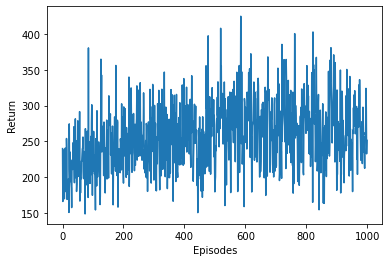

In [27]:
x_axis = np.arange(0,total_episodes)
plt.plot(x_axis,total_reward_perc)
plt.xlabel('Episodes')
plt.ylabel('Return')